In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# load pima dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(path)
pima.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [24]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(max_iter=1000) # set max_iter to high # if a warning shows


In [25]:
# train test split
from sklearn.model_selection import train_test_split

X = pima.drop('label', axis=1)
y = pima.label
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [26]:
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
# predictions
y_test_pred = logreg_clf.predict(X_test)
y_test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
proba = logreg_clf.predict_proba(X_test)[:,1] # probability label is 1. Label for correspondeing is 1 if prob > 0.5, 0 if prob <= 0.5
proba

array([0.20531339, 0.72040301, 0.30446332, 0.19791906, 0.09457666,
       0.19343516, 0.39588436, 0.20156512, 0.03663605, 0.61159177,
       0.28147703, 0.18480994, 0.08660901, 0.35083879, 0.5147051 ,
       0.28843355, 0.17686683, 0.09725724, 0.73127931, 0.04422643,
       0.41494473, 0.40086249, 0.6879834 , 0.77441071, 0.22144718,
       0.35118505, 0.14612768, 0.93192241, 0.60700805, 0.11439043,
       0.17294578, 0.20537622, 0.16997984, 0.05985154, 0.72653533,
       0.11933398, 0.96833775, 0.46647562, 0.65009708, 0.15269815,
       0.91808701, 0.08371116, 0.27582967, 0.09516305, 0.26319638,
       0.04064865, 0.52142111, 0.95491695, 0.61267128, 0.06710591,
       0.18944498, 0.03492631, 0.13949429, 0.21953386, 0.38420721,
       0.28229061, 0.28895818, 0.82329614, 0.1300231 , 0.3843742 ,
       0.76503346, 0.3798013 , 0.00250989, 0.50057552, 0.23151858,
       0.5523108 , 0.02072675, 0.08239228, 0.21741625, 0.23029062,
       0.89414727, 0.1629324 , 0.56145401, 0.07002359, 0.11578

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred)) # recall is TP over TP + FN
print(precision_score(y_test,y_test_pred)) # precion is TP over TP + FP

0.7552083333333334
0.5373134328358209
0.6923076923076923


In [43]:
# changing the 0.5 threshold (scikit learn always uses 0.5)
threshold = 0.3
y_test_pred = np.zeros(len(y_test))
y_test_pred[proba>threshold]=1

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1.])

In [44]:
# test scores after changing precsion
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred)) # recall is TP over TP + FN
print(precision_score(y_test,y_test_pred)) # precion is TP over TP + FP

0.7552083333333334
0.7611940298507462
0.6219512195121951


In [52]:
# to find best threshold, loop over different values
threshold_list = np.linspace(0,1,100) # 100 evenly spaced points between 0 and 1

In [53]:
recalls = [] # empty list
precisions = []
accuracies = []
for threshold in threshold_list:
    y_test_pred = np.zeros(len(y_test))
    y_test_pred[proba>threshold]=1
    recalls.append(recall_score(y_test,y_test_pred))
    precisions.append(precision_score(y_test,y_test_pred))
    accuracies.append(accuracy_score(y_test,y_test_pred))

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'evaluation metric as a function of the threshold')

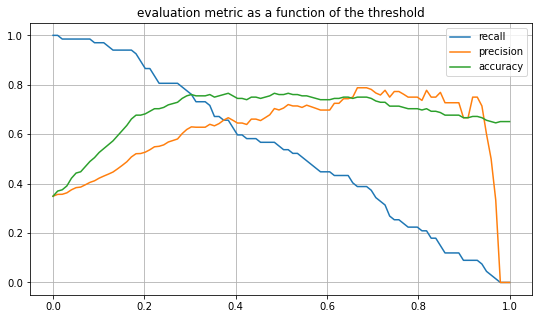

In [69]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(threshold_list, recalls, label='recall')
ax.plot(threshold_list, precisions, label='precision')
ax.plot(threshold_list, accuracies, label='accuracy')
ax.legend()
ax.grid(True)
ax.set_title('evaluation metric as a function of the threshold')

Text(0.5, 1.0, 'precision-recall trade off')

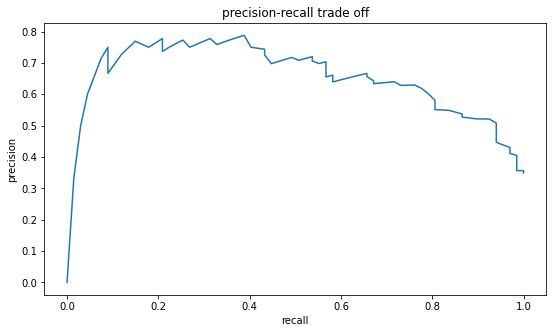

In [72]:
# recall-precision trade off
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(recalls,precisions)
ax.set_xlabel('recall')
ax.set_ylabel('precision')
ax.set_title('precision-recall trade off')


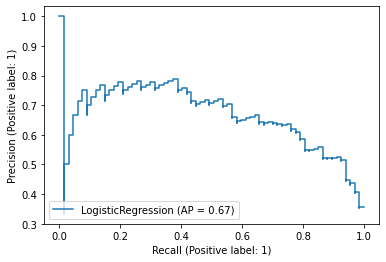

In [73]:
# do same plot above but using scikit learn
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(logreg_clf,X_test,y_test)

In [79]:
# AP refers to the "average precision" which is area under precision-recall curve, the close to 1 the better
# to get number manually: 
from sklearn.metrics import average_precision_score
average_precision_score(y_test,proba)

0.6684161052149719

In [80]:
# TPR (true positive rate) = TP / (TP + FN)
# FPR (false positive rate) = FP / (TN + FP)
# AUC (area under curve), perfect if =1, good to weak, decent from 0.9-0,8-0,7


## ROC and AUC

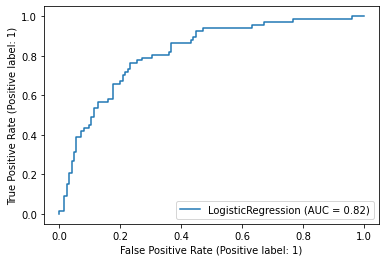

In [82]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg_clf, X_test, y_test)

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, proba)

0.8173134328358209